# scaffolding of de novo genome assemblies

In [ ]:
import trackc as tc
import cooler
import time

In [2]:
clr = cooler.Cooler('contig_bin_interaction.mcool::/resolutions/500000')

## random contig order

no max min range
maxrange: 36.0 minrange: 1.0


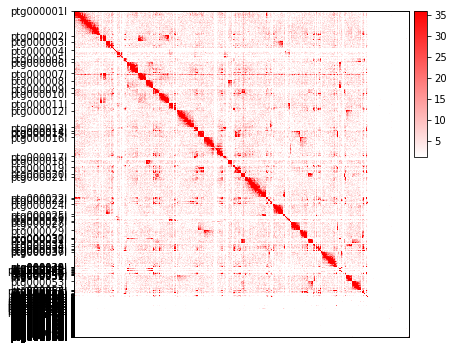

In [3]:
fig, axs = tc.make_spec(figsize=(6, 6), width_ratios=[1], wspace=0.2)

mat = clr.matrix(balance=False)[:]
tc.pl.mapC(ax=axs[0], mat=mat, map_type="squ", symmetric=True)
chromstarts = [clr.extent(i)[0] for i in clr.chromnames]
_ = axs[0].set(yticks=chromstarts, yticklabels=clr.chromnames)
# tc.savefig('all_chrom_cmap.pdfx')

## inside chrom/scaffold rearrange contig order or Orientation

In [186]:
chrom_contigs = reorder.query('Chromosome=="chr04"')
display(chrom_contigs)
order1 = chrom_contigs['region'].to_list()

import random
order2 = random.sample(order1, len(order1))

,Chromosome,Start,End,Order,Tag,Contig_ID,Contig_start,Contig_end,Orientation,base0_start,base0_end,region
57,chr04,1,81175125,1,W,ptg000018l,1,81175125,-,81175124,0,ptg000018l:81175124-0
59,chr04,81175226,168412693,3,W,ptg000008l,1,87237468,+,0,87237467,ptg000008l:0-87237467
61,chr04,168412794,172158802,5,W,ptg000031l,1,3746009,+,0,3746008,ptg000031l:0-3746008
63,chr04,172158903,183822856,7,W,ptg000044l,1,11663954,-,11663953,0,ptg000044l:11663953-0
65,chr04,183822957,314807117,9,W,ptg000006l,1,130984161,+,0,130984160,ptg000006l:0-130984160
67,chr04,314807218,315127496,11,W,ptg000056c,1,320279,-,320278,0,ptg000056c:320278-0
69,chr04,315127597,328337094,13,W,ptg000048l,1,13209498,+,0,13209497,ptg000048l:0-13209497
71,chr04,328337195,329026905,15,W,ptg000059l,1,689711,+,0,689710,ptg000059l:0-689710
73,chr04,329027006,330895159,17,W,ptg000047l,1,1868154,-,1868153,0,ptg000047l:1868153-0
75,chr04,330895260,332955347,19,W,ptg000068l,1,2060088,+,0,2060087,ptg000068l:0-2060087


no max min range
maxrange: 243.0 minrange: 1.0
no max min range
maxrange: 243.0 minrange: 1.0


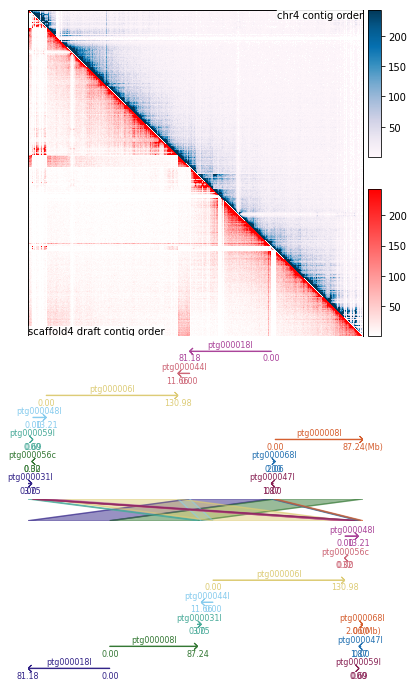

In [187]:
start_time = time.time()
r1_mat = tc.tl.extractContactRegions(clr=clr, row_regions=order1)
r2_mat = tc.tl.extractContactRegions(clr=clr, row_regions=order2)
time.time()- start_time

ten = tc.tenon(figsize=(6, 1))
ten.add(pos="bottom", height=6)
ten.add(pos="bottom", height=3)
ten.add(pos="bottom", height=0.4)
ten.add(pos="bottom", height=3)


tc.pl.mapC(ax=ten.axs(0), 
           mat=r1_mat.cmat,
           mat2=r2_mat.cmat,
           label=['chr4 contig order', 'scaffold4 draft contig order'],
           cmap=['PuBu', tc.pa.fruitpunch],
           map_type="squ")

tc.pl.multi_scale_track(ten.axs(1), regions=order2, scale_adjust="Mb", intervals=7, tick_rotation=0)

tc.pl.zoomin(
    ax=ten.axs(2),
    raw_regions=order2,
    zoomin_regions=order1,
    line_on=True,
    fill=True,
    alpha=0.5,
)

tc.pl.multi_scale_track(ten.axs(3), regions=order1, scale_adjust="Mb", intervals=7, tick_rotation=0)


# tc.savefig('reorder_contig.pdf')